In [22]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

#data_path = os.path.expandvars('C:/Users/$USERNAME/Desktop/data/05_digit_recognition/')
# dataset: http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

### Exercise 1 Data Acquisition
* Load the training data for the digits `['four', 'five', 'six', 'seven']`.

In [4]:
import lib_digit as lib

lib.rel_thresh = 0.5
lib.min_length = 0.25 # 250ms
lib.frames_select = 6
x_train, t_train, x_test, t_test, val_split = lib.load_dataset('./mnist', ['four','five','six','seven'])

four:   0%|          | 0/2372 [00:00<?, ?files/s]

five:   0%|          | 0/2357 [00:00<?, ?files/s]

six:   0%|          | 0/2369 [00:00<?, ?files/s]

seven:   0%|          | 0/2377 [00:00<?, ?files/s]

* Select one instance (dictionary) from the training set and display the dimensions of all contained features by iterating over the keys.

In [5]:
sample_instance = x_train[0]
for key in sample_instance.keys():
    print(f"Feature: {key}, Shape: {sample_instance[key].shape}")

Feature: log_mel, Shape: (128, 6)
Feature: mfcc, Shape: (30, 6)


* Create a FeatureSelector object and use it to generate a matrix mel_train where one row corresponds to the flattened log mel spectrum of one training instance.

In [9]:
feature_selector = lib.FeatureSelector(mfcc=0, log_mel='all')
mel_train = feature_selector.transform(x_train)
#print(mel_train.shape)

(5130, 768)


* How many features does one instance have?

In [7]:
num_features = mel_train.shape[1]
print(f"Number of features in one instance: {num_features}")

Number of features in one instance: 768


* Use the same object to generate a matrix mel_test containing the test data.

In [69]:
mel_test = feature_selector.transform(x_test)
print(mel_test.shape)

(652, 768)


### Exercise 2 Logistic Regression 
* Create a logistic regression object with C=1000 and max_iter=1000.
* Train the model with the extracted training data (mel spectra). Probably you will receive a warning that the training did not converge.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lr = LogisticRegression(max_iter=1000)
lr.fit(mel_train,t_train)
#scaler = StandardScaler()

#pipe = Pipeline(steps=[('scaler', scaler),('estimator', lr)])
#pipe.fit(mel_train, t_train)

c:\Users\kaspe\OneDrive - Aalto University\RWTH\Courses\61.00004 Audio Processing Using Python\code prerequisites-20240421\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Exercise 3 Model Evaluation
* Compute all predicted posterior probabilities on the test set and then plot $p(\texttt{’four’}|\mathbf{x})$ for all x in the test set.
* In the same diagram add a line with the true posterior probability p(’four’|x).
This probability is 1 if it is known that an instance is a 'four' and zero otherwise.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
t_test_pred = lr.predict(mel_test)
accuracy_test = accuracy_score(t_test, t_test_pred)
print(f"Test Accuracy: {accuracy_test:.4f}")

Test Accuracy: 0.9018


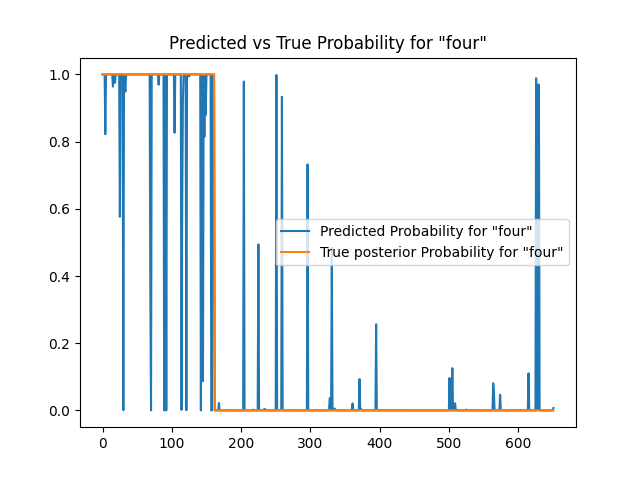

In [87]:
#predicted posterior probability p^ for 'four' in the test set
prob_test = lr.predict_proba(mel_test)
#print(y_pred_linear.shape)
#(true) posterior probability p for 'four' in the test set
true_pos_prob = np.where(np.array(t_test) == 4, 1, 0)
#print(true_pos_prob)

plt.figure()
plt.plot(prob_test[:,0], label='Predicted Probability for "four"') #select first number to plot, 'four'
plt.plot(true_pos_prob, label='True posterior Probability for "four"')
plt.title('Predicted vs True Probability for "four"')
plt.legend()
plt.show()

* In another diagram, generate the same curves for the training set. Is the training data linearly separable?


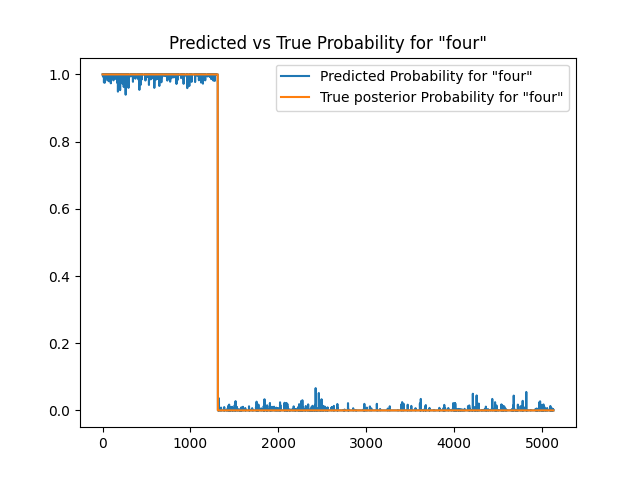

In [88]:
#predicted posterior probability p^ for 'four' in the test set
prob_test = lr.predict_proba(mel_train)
#print(y_pred_linear.shape)
#(true) posterior probability p for 'four' in the test set
true_pos_prob = np.where(np.array(t_train) == 4, 1, 0)
#print(true_pos_prob)

plt.figure()
plt.plot(prob_test[:,0], label='Predicted Probability for "four"') #select first number to plot, 'four'
plt.plot(true_pos_prob, label='True posterior Probability for "four"')
plt.title('Predicted vs True Probability for "four"')
plt.legend()
plt.show()
#The training data is linearly separable, all data points that are 'four' are in the beginning

* Visualize the normalized confusion matrix for the test set. Which false classification happens most often?

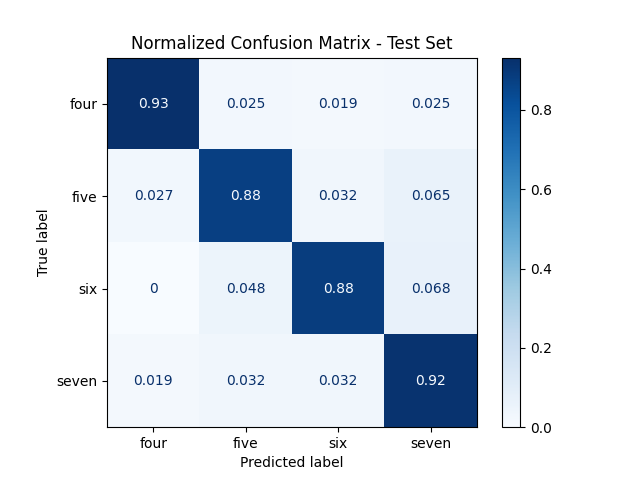

In [100]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(t_test, t_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['four','five','six','seven'])
plt.title('Normalized Confusion Matrix - Test Set')
plt.show()
# Most often six is classified as seven

### Exercise 4
* Create a Pipeline with a `FeatureSelector` and a `LogisticRegression` object. Let
the `FeatureSelector` select only the log-mel-spectra and allow 1000 iterations
for the `LogisticRegression` object. Set the `Pipeline`’s `verbose` attribute to `True`
in order to see the fitting time.
* Fit the `Pipeline` with the training data and compute the accuracy score on the test set.

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Define Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Create the pipeline with verbose output to see fitting time
pipeline_log_mel = Pipeline([
    ('estimator', log_reg)
], verbose=True)

# Train the model with the extracted training data, mel_train already pipelined with FeatureSelector
pipeline_log_mel.fit(mel_train, t_train)

#accuracy score
accuracy_log_mel = pipeline_log_mel.score(mel_test, t_test)

print(f"Pipeline with log-mel spectra - Accuracy: {accuracy_log_mel:.4f}")

[Pipeline] ......... (step 1 of 1) Processing estimator, total=  10.8s
Pipeline with log-mel spectra - Accuracy: 0.9018


c:\Users\kaspe\OneDrive - Aalto University\RWTH\Courses\61.00004 Audio Processing Using Python\code prerequisites-20240421\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Then add a `StandardScaler` to the `Pipeline` and compare accuracy and fitting time.

In [112]:
from sklearn.preprocessing import StandardScaler
pipeline_log_mel = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', log_reg)
], verbose=True)

# Train the model with the extracted training data, mel_train already pipelined with FeatureSelector
pipeline_log_mel.fit(mel_train, t_train)

#accuracy score
accuracy_log_mel = pipeline_log_mel.score(mel_test, t_test)

print(f"Pipeline with log-mel spectra - Accuracy: {accuracy_log_mel:.4f}")

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   2.2s
Pipeline with log-mel spectra - Accuracy: 0.9003


* Repeat these steps but let the FeatureSelector select all cepstral coefficients.

In [115]:
feature_selector = lib.FeatureSelector(mfcc='all', log_mel='all')
mel_train = feature_selector.transform(x_train)
mel_test = feature_selector.transform(x_test)

In [116]:
#logisticregression
# Define Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Create the pipeline with verbose output to see fitting time
pipeline_log_mel = Pipeline([
    ('estimator', log_reg)
], verbose=True)

# Train the model with the extracted training data, mel_train already pipelined with FeatureSelector
pipeline_log_mel.fit(mel_train, t_train)

#accuracy score
accuracy_log_mel = pipeline_log_mel.score(mel_test, t_test)

print(f"Pipeline with log-mel spectra - Accuracy: {accuracy_log_mel:.4f}")

[Pipeline] ......... (step 1 of 1) Processing estimator, total=  12.8s
Pipeline with log-mel spectra - Accuracy: 0.8911


c:\Users\kaspe\OneDrive - Aalto University\RWTH\Courses\61.00004 Audio Processing Using Python\code prerequisites-20240421\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
#logisticregression with standardscaler
pipeline_log_mel = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', log_reg)
], verbose=True)

# Train the model with the extracted training data, mel_train already pipelined with FeatureSelector
pipeline_log_mel.fit(mel_train, t_train)

#accuracy score
accuracy_log_mel = pipeline_log_mel.score(mel_test, t_test)

print(f"Pipeline with log-mel spectra - Accuracy: {accuracy_log_mel:.4f}")

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   2.7s
Pipeline with log-mel spectra - Accuracy: 0.8880


* Denote accuracy and fitting times in the following table. How do scaler and the reduced number of features impact the pipeline?

| Feature 	| With Scaler 	| Fitting Time 	| Accuracy 	|
|---------	|-------------	|--------------	|----------	|
| log_mel 	| no          	| 10.8          | 0.9018      	|
| log_mel 	| yes         	| 2.3           | 0.9003      	|
| mfcc    	| no          	| 12.8          | 0.8911      	|
| mfcc    	| yes         	| 2.8           | 0.8880      	|


### Exercise 5: Grid Search

* Create a Pipeline with cepstral coefficiens as input features, standard scaling
and logistic regression with a maximum of 1000 iterations.

* Define a parameter grid where you vary the regularization parameter `C` of the
estimator in an exponential range from $10^{−5}$ to $10^5$ and the number of selected
cepstral coefficients between 2 and 30 in steps in 4.

In [ ]:
from sklearn.model_selection import GridSearchCV

### Exercise 6: Dimensionality Reduction
* Create a `Pipeline` with a `FeatureSelector` and a `KNeighborsClassifier`. The
`FeatureSelector` should select the mel-frequency spectrum. Fit the `Pipeline`
and display the accuracy on the test set.

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

* Now create a second `Pipeline`, where a `NeighborhoodComponentAnalysis` is added
before the classifier, and provide a memory argument, so that the `Pipeline` is able to cache fitted estimators.
* Create a parameter grid where you vary `nca__n_components` (4-5 values) and
`knn__n_neighbors` (5-8 values).
* Create a `GridSearchCV` with the Pipeline, the parameter grid and the argument
`verbose=3.`
* Fit the grid search and investigate the fitting time for the parameter configurations.
How can you observe the effect of caching?

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

### Exercise 7

### Exercise 8
* Your turn!